In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [4]:
df = pd.read_csv(r'C:\Users\Garvit\Downloads\Data-Collisions.csv')
df.head()

C:\Users\Garvit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE           X          Y   STATUS      ADDRTYPE  \
0             2 -122.323148  47.703140  Matched  Intersection   
1             1 -122.347294  47.647172  Matched         Block   
2             1 -122.334540  47.607871  Matched         Block   
3             1 -122.334803  47.604803  Matched         Block   
4             2 -122.306426  47.545739  Matched  Intersection   

                     SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
0                Injury Collision        Angles            2         0   
1  Property Damage Only Collision     Sideswipe            2         0   
2  Property Damage Only Collision    Parked Car            4         0   
3  Property Damage Only Collision         Other            3         0   
4                Injury Collision        Angles            2         0   

   PEDCYLCOUNT  ...  SDOT_COLCODE UNDERINFL   WEATHER  ROADCOND  \
0            0  ...            11         N  Overcast       Wet   
1            0  ...            16         0   Raining       Wet   
2            0  ...            14         0  Overcast       Dry   
3            0  ...            11         N     Clear       Dry   
4            0  ...            11         0   Raining       Wet   

                 LIGHTCOND ST_COLCODE  \
0                 Daylight         10   
1  Dark - Street Lights On         11   
2                 Daylight         32   
3                 Daylight         23   
4                 Daylight         10   

                                          ST_COLDESC SEGLANEKEY CROSSWALKKEY  \
0                                  Entering at angle          0            0   
1  From same direction - both going straight - bo...          0            0   
2                             One parked--one moving          0            0   
3                   From same direction - all others          0            0   
4                                  Entering at angle          0            0   

  HITPARKEDCAR  
0            N  
1            N  
2            N  
3            N  
4            N  

[5 rows x 23 columns]

In [5]:
df = df.dropna()
df.shape

(180067, 23)

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'ADDRTYPE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df.SEVERITYCODE.unique()

array([2, 1], dtype=int64)

In [8]:
category0 = pd.cut(df.SDOT_COLCODE, bins=[0, 15, 30, 45, 60, 75],labels=['0','1', '2', '3', '4'])
df.insert(13,'SDOT_Cat',category0)
df.head()

SEVERITYCODE           X          Y   STATUS      ADDRTYPE  \
0             2 -122.323148  47.703140  Matched  Intersection   
1             1 -122.347294  47.647172  Matched         Block   
2             1 -122.334540  47.607871  Matched         Block   
3             1 -122.334803  47.604803  Matched         Block   
4             2 -122.306426  47.545739  Matched  Intersection   

                     SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
0                Injury Collision        Angles            2         0   
1  Property Damage Only Collision     Sideswipe            2         0   
2  Property Damage Only Collision    Parked Car            4         0   
3  Property Damage Only Collision         Other            3         0   
4                Injury Collision        Angles            2         0   

   PEDCYLCOUNT  ...  SDOT_COLCODE UNDERINFL   WEATHER ROADCOND  \
0            0  ...            11         N  Overcast      Wet   
1            0  ...            16         0   Raining      Wet   
2            0  ...            14         0  Overcast      Dry   
3            0  ...            11         N     Clear      Dry   
4            0  ...            11         0   Raining      Wet   

                 LIGHTCOND ST_COLCODE  \
0                 Daylight         10   
1  Dark - Street Lights On         11   
2                 Daylight         32   
3                 Daylight         23   
4                 Daylight         10   

                                          ST_COLDESC SEGLANEKEY CROSSWALKKEY  \
0                                  Entering at angle          0            0   
1  From same direction - both going straight - bo...          0            0   
2                             One parked--one moving          0            0   
3                   From same direction - all others          0            0   
4                                  Entering at angle          0            0   

  HITPARKEDCAR  
0            N  
1            N  
2            N  
3            N  
4            N  

[5 rows x 24 columns]

In [9]:
df['ST_COLCODE'] = df['ST_COLCODE'].astype(int)

In [10]:
category1 = pd.cut(df.ST_COLCODE, bins=[0, 20, 40, 60, 80, 100],labels=['0','1', '2', '3', '4'])
df.insert(19,'ST_Cat',category1)
df.shape

(180067, 25)

In [11]:
df = df.drop(['SDOT_COLCODE', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYDESC', 'ST_COLDESC' ], axis = 1)
df.head()

SEVERITYCODE           X          Y   STATUS      ADDRTYPE COLLISIONTYPE  \
0             2 -122.323148  47.703140  Matched  Intersection        Angles   
1             1 -122.347294  47.647172  Matched         Block     Sideswipe   
2             1 -122.334540  47.607871  Matched         Block    Parked Car   
3             1 -122.334803  47.604803  Matched         Block         Other   
4             2 -122.306426  47.545739  Matched  Intersection        Angles   

   PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT                 INCDTTM  \
0            2         0            0         2    3/27/2013 2:54:00 PM   
1            2         0            0         2   12/20/2006 6:55:00 PM   
2            4         0            0         3  11/18/2004 10:20:00 AM   
3            3         0            0         3    3/29/2013 9:26:00 AM   
4            2         0            0         2    1/28/2004 8:04:00 AM   

                              JUNCTIONTYPE SDOT_Cat UNDERINFL   WEATHER  \
0   At Intersection (intersection related)        0         N  Overcast   
1  Mid-Block (not related to intersection)        1         0   Raining   
2  Mid-Block (not related to intersection)        0         0  Overcast   
3  Mid-Block (not related to intersection)        0         N     Clear   
4   At Intersection (intersection related)        0         0   Raining   

  ROADCOND                LIGHTCOND ST_Cat HITPARKEDCAR  
0      Wet                 Daylight      0            N  
1      Wet  Dark - Street Lights On      0            N  
2      Dry                 Daylight      1            N  
3      Dry                 Daylight      1            N  
4      Wet                 Daylight      0            N

In [12]:
df = pd.get_dummies(df, columns = ['STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND',  'HITPARKEDCAR', 'UNDERINFL'])

In [13]:
df.shape

(180067, 66)

In [14]:
df = df.dropna()

In [15]:
df.shape

(174329, 66)

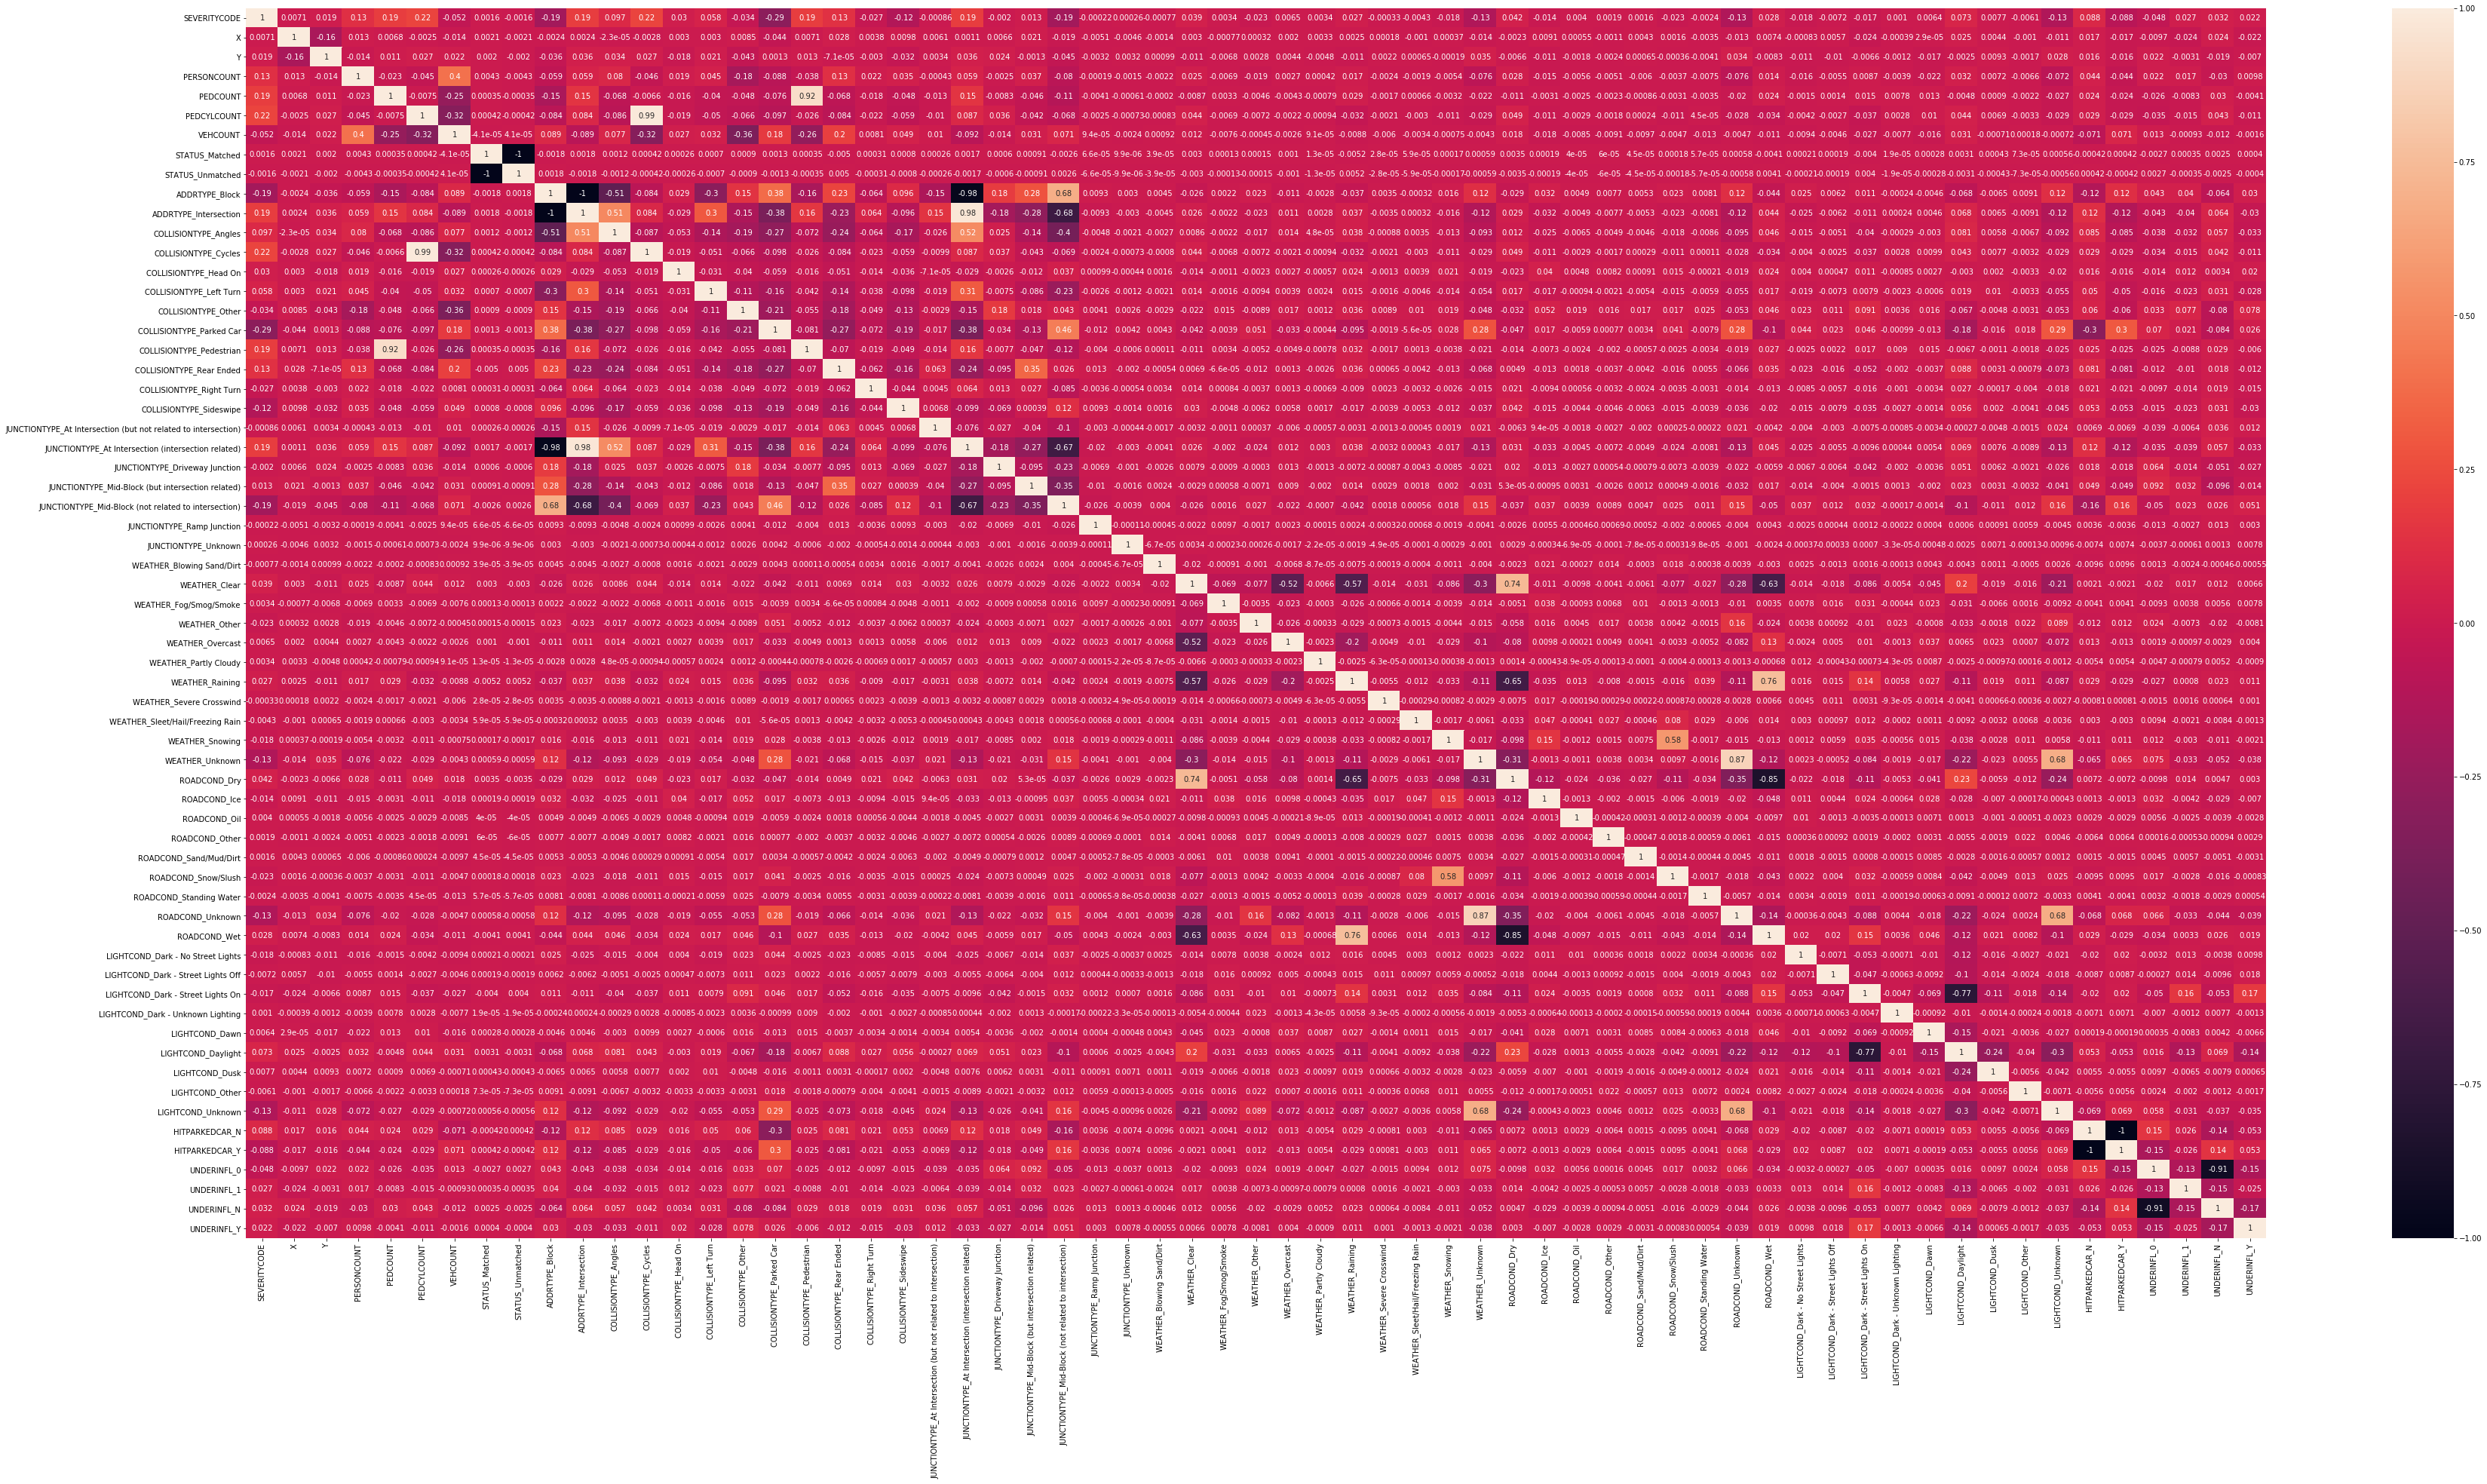

In [60]:
#co-relation matrix
fig, ax = plt.subplots(figsize=(60,30))
sns.heatmap(df.corr(), annot=True, ax = ax)
plt.show()

In [16]:
df.describe()

SEVERITYCODE              X              Y    PERSONCOUNT  \
count  174329.000000  174329.000000  174329.000000  174329.000000   
mean        1.304476    -122.330467      47.619470       2.490567   
std         0.460186       0.029983       0.056492       1.380022   
min         1.000000    -122.419091      47.495573       0.000000   
25%         1.000000    -122.348673      47.575086       2.000000   
50%         1.000000    -122.330224      47.615284       2.000000   
75%         2.000000    -122.311916      47.663996       3.000000   
max         2.000000    -122.238949      47.734142      81.000000   

            PEDCOUNT    PEDCYLCOUNT       VEHCOUNT  STATUS_Matched  \
count  174329.000000  174329.000000  174329.000000   174329.000000   
mean        0.023737       0.030597       1.990610        0.999994   
std         0.160554       0.173552       0.552692        0.002395   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       2.000000        1.000000   
50%         0.000000       0.000000       2.000000        1.000000   
75%         0.000000       0.000000       2.000000        1.000000   
max         5.000000       2.000000      11.000000        1.000000   

       STATUS_Unmatched  ADDRTYPE_Block  ...  LIGHTCOND_Daylight  \
count     174329.000000   174329.000000  ...       174329.000000   
mean           0.000006        0.650924  ...            0.628685   
std            0.002395        0.476679  ...            0.483158   
min            0.000000        0.000000  ...            0.000000   
25%            0.000000        0.000000  ...            0.000000   
50%            0.000000        1.000000  ...            1.000000   
75%            0.000000        1.000000  ...            1.000000   
max            1.000000        1.000000  ...            1.000000   

       LIGHTCOND_Dusk  LIGHTCOND_Other  LIGHTCOND_Unknown  HITPARKEDCAR_N  \
count   174329.000000    174329.000000      174329.000000   174329.000000   
mean         0.031796         0.000941           0.051116        0.970131   
std          0.175458         0.030657           0.220235        0.170226   
min          0.000000         0.000000           0.000000        0.000000   
25%          0.000000         0.000000           0.000000        1.000000   
50%          0.000000         0.000000           0.000000        1.000000   
75%          0.000000         0.000000           0.000000        1.000000   
max          1.000000         1.000000           1.000000        1.000000   

       HITPARKEDCAR_Y    UNDERINFL_0    UNDERINFL_1  UNDERINFL_N  \
count   174329.000000  174329.000000  174329.000000  174329.0000   
mean         0.029869       0.437173       0.021431       0.5142   
std          0.170226       0.496039       0.144816       0.4998   
min          0.000000       0.000000       0.000000       0.0000   
25%          0.000000       0.000000       0.000000       0.0000   
50%          0.000000       0.000000       0.000000       1.0000   
75%          0.000000       1.000000       0.000000       1.0000   
max          1.000000       1.000000       1.000000       1.0000   

         UNDERINFL_Y  
count  174329.000000  
mean        0.027196  
std         0.162654  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 63 columns]

In [19]:
feature_columns = [
'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'SDOT_Cat',
 'ST_Cat',
 'STATUS_Matched',
 'STATUS_Unmatched',
 'ADDRTYPE_Block',
 'ADDRTYPE_Intersection',
 'COLLISIONTYPE_Angles',
 'COLLISIONTYPE_Cycles',
 'COLLISIONTYPE_Head On',
 'COLLISIONTYPE_Left Turn',
 'COLLISIONTYPE_Other',
 'COLLISIONTYPE_Parked Car',
 'COLLISIONTYPE_Pedestrian',
 'COLLISIONTYPE_Rear Ended',
 'COLLISIONTYPE_Right Turn',
 'COLLISIONTYPE_Sideswipe',
 'JUNCTIONTYPE_At Intersection (but not related to intersection)',
 'JUNCTIONTYPE_At Intersection (intersection related)',
 'JUNCTIONTYPE_Driveway Junction',
 'JUNCTIONTYPE_Mid-Block (but intersection related)',
 'JUNCTIONTYPE_Mid-Block (not related to intersection)',
 'JUNCTIONTYPE_Ramp Junction',
 'JUNCTIONTYPE_Unknown',
 'WEATHER_Blowing Sand/Dirt',
 'WEATHER_Clear',
 'WEATHER_Fog/Smog/Smoke',
 'WEATHER_Other',
 'WEATHER_Overcast',
 'WEATHER_Partly Cloudy',
 'WEATHER_Raining',
 'WEATHER_Severe Crosswind',
 'WEATHER_Sleet/Hail/Freezing Rain',
 'WEATHER_Snowing',
 'WEATHER_Unknown',
 'ROADCOND_Dry',
 'ROADCOND_Ice',
 'ROADCOND_Oil',
 'ROADCOND_Other',
 'ROADCOND_Sand/Mud/Dirt',
 'ROADCOND_Snow/Slush',
 'ROADCOND_Standing Water',
 'ROADCOND_Unknown',
 'ROADCOND_Wet',
 'LIGHTCOND_Dark - No Street Lights',
 'LIGHTCOND_Dark - Street Lights Off',
 'LIGHTCOND_Dark - Street Lights On',
 'LIGHTCOND_Dark - Unknown Lighting',
 'LIGHTCOND_Dawn',
 'LIGHTCOND_Daylight',
 'LIGHTCOND_Dusk',
 'LIGHTCOND_Other',
 'LIGHTCOND_Unknown',
 'HITPARKEDCAR_N',
 'HITPARKEDCAR_Y',
 'UNDERINFL_0',
 'UNDERINFL_1',
 'UNDERINFL_N',
 'UNDERINFL_Y']

In [17]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [20]:
X = df[feature_columns]
y = df.SEVERITYCODE

Severety Code 2:  121250
Severety Code 1:  53079


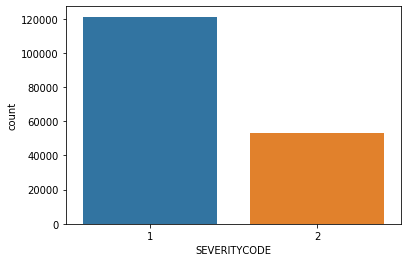

In [54]:
#visualizatons
ax = sns.countplot(y, label = 'Count')
A, B = y.value_counts()
print('Severety Code 2: ', A)
print('Severety Code 1: ', B)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
#decision-tree
dt = DecisionTreeClassifier()

dt = dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.731084724373315


In [42]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\Garvit\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0567783 to fit



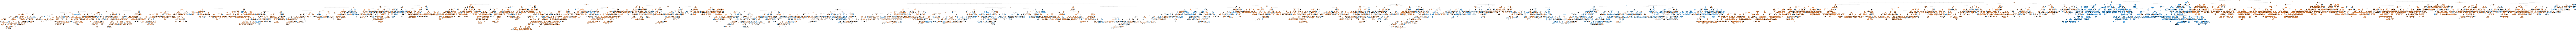

In [43]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#knn
knn = KNeighborsClassifier(n_neighbors = 9)
knn = knn.fit (X_train, y_train)
y_pred1 = knn.predict(X_test)
print ('Accuracy: ' , metrics.accuracy_score(y_test, y_pred1))

Accuracy:  0.7291344002753398


In [28]:
from sklearn.linear_model import LogisticRegression

C:\Users\Garvit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy:  0.7419262318591178


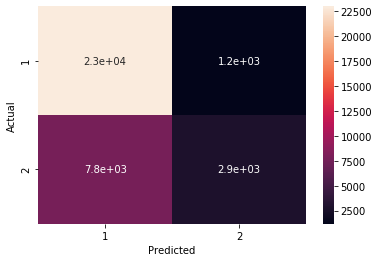

In [30]:
#logistic-regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()